In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
print(sys.path)

['/home/hieutt/UniCon_EnetV2_OpenMax/notebooks', '/home/hieutt/miniconda3/envs/torchtf/lib/python39.zip', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9/lib-dynload', '', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9/site-packages', '../']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_unk_prob_from_npz(npz_path='../save/prob/unk_prob_distributions.npz', save_path=None):
    # Load data
    data = np.load(npz_path)
    known_probs = data['known']
    unknown_probs = data['unknown']

    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(known_probs, bins=100, kde=True, color='green', label='Known', stat='density', alpha=0.6)
    sns.histplot(unknown_probs, bins=100, kde=True, color='red', label='Unknown', stat='density', alpha=0.6)

    # Vertical line at default threshold
    plt.axvline(0.5, color='black', linestyle='--', label='Threshold = 0.5')

    plt.xlabel('unk_prob (probability being unknown)')
    plt.ylabel('Density')
    plt.title('Distribution of unk_prob (Known vs Unknown)')
    plt.legend()
    plt.grid(True)

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to: {save_path}")
    else:
        plt.show()

# Example usage
plot_unk_prob_from_npz("unk_prob_distributions.npz", save_path="unk_prob_histogram.png")


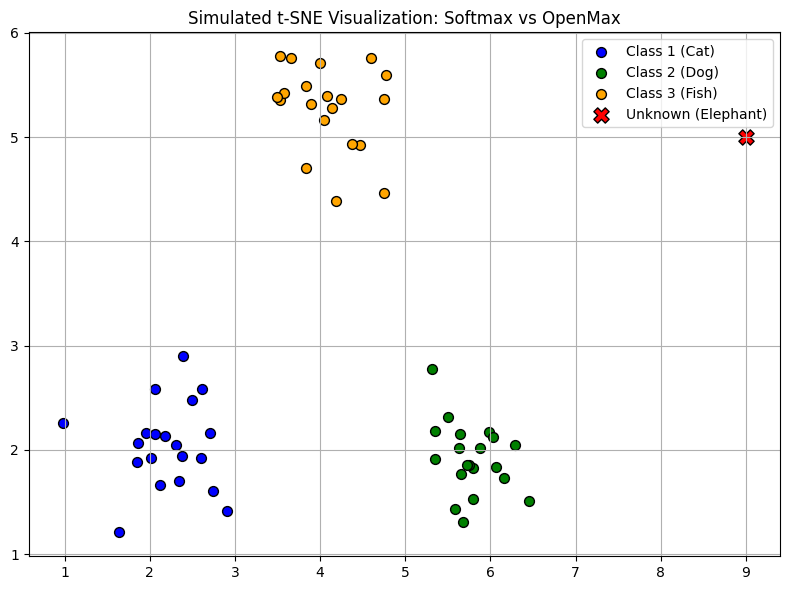

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate 3 known classes and 1 unknown point
np.random.seed(0)
class1 = np.random.normal(loc=[2, 2], scale=0.4, size=(20, 2))
class2 = np.random.normal(loc=[6, 2], scale=0.4, size=(20, 2))
class3 = np.random.normal(loc=[4, 5], scale=0.4, size=(20, 2))
unknown = np.array([[9, 5]])  # Far from all classes

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], c='blue', label='Class 1 (Cat)', s=50, edgecolor='k')
plt.scatter(class2[:, 0], class2[:, 1], c='green', label='Class 2 (Dog)', s=50, edgecolor='k')
plt.scatter(class3[:, 0], class3[:, 1], c='orange', label='Class 3 (Fish)', s=50, edgecolor='k')
plt.scatter(unknown[:, 0], unknown[:, 1], c='red', label='Unknown (Elephant)', s=120, edgecolor='k', marker='X')

plt.title("Simulated t-SNE Visualization: Softmax vs OpenMax")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
